In [15]:
import visualkeras
from DQNetwork import DQN
from Environment import AtariEnv
from PolicyNetwork import Policy
import numpy as np
import pickle
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.graph_objs.layout import YAxis,XAxis,Margin


In [16]:
# --- Resume Training ---
resume = True

# --- Define Game Environment ---
game = 'ALE/Atlantis-v5' # 'ALE/Atlantis-v5' or 'Atlantis-v4' or 'Atlantis-v0'
render_mode = "rgb_array" # "human" or "rgb_array"
obs_type = "grayscale" # "grayscale" or "ram"
full_action_space = False
frameskip = 1
repeat_action_probability = 0.0
# make environment
env = AtariEnv(game, render_mode, obs_type, full_action_space, frameskip, repeat_action_probability)

# --- Define Hyperparameters ---
alpha = 0.00025
gamma = 0.99
input_shape = (80, 84, 4)
# --- Logging Filepaths ---
log_dir = '/Users/rossschrader/Desktop/ML/CS/_Project/logs/v4/'

Q = DQN(env.action_space, input_shape, alpha, gamma, name = log_dir + 'Q', resume=False)

/Users/rossschrader/env/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:31: UserWarning:

WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (210, 160)

/Users/rossschrader/env/lib/python3.9/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



## Neural Network Architecture

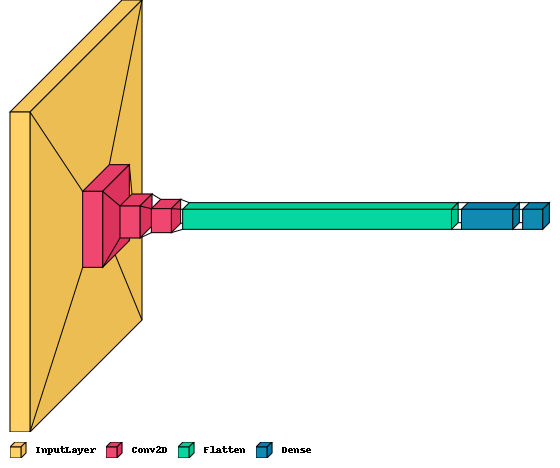

In [17]:
visualkeras.layered_view(Q.model, legend=True)

In [18]:
Q.model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 84, 80, 4)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 19, 32)        8224      
                                                                 
 conv2d_4 (Conv2D)           (None, 9, 8, 64)          32832     
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 6, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 2688)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               1376768   
                                                                 
 dense_3 (Dense)             (None, 4)                 2052

## Training Results

In [19]:
log_dir = '/Users/rossschrader/Desktop/ML/CS/_Project/logs/v4/'

with open(log_dir + 'frame_count.pickle', 'rb') as file:
    frame_count = pickle.load(file)
with open(log_dir + 'episode_count.pickle', 'rb') as file:
    episode_count = pickle.load(file)
with open(log_dir + 'episode_reward_history.pickle', 'rb') as file:
    episode_reward_history = pickle.load(file)
with open(log_dir + 'running_reward_history.pickle', 'rb') as file:
    running_reward_history = pickle.load(file)
with open(log_dir + 'Q_loss.pickle', 'rb') as file:
    loss = pickle.load(file)

data = pd.DataFrame({'Episode Reward': episode_reward_history, 
                     'Average Reward': running_reward_history, 
                     'Frames' : np.linspace(0, frame_count, len(episode_reward_history)),
                     'Human Benchmark' : 29028 * np.ones(len(episode_reward_history))}
                     )

In [20]:
layout = go.Layout(title='Episode Reward History', 
                   xaxis=XAxis(title='Episode'), xaxis2 = XAxis(title='Frames', side='top', overlaying='x'), 
                   yaxis=dict(title='Reward')
                   )

fig2 = go.Figure(layout=layout)

fig2.add_trace(go.Scatter(x=data['Episode Reward'].index, y=data['Episode Reward'], name='Episode Reward'))
fig2.add_trace(go.Scatter(x=data['Frames'], y=data['Average Reward'], name='Average Reward', xaxis = 'x2'))
fig2.add_trace(go.Scatter(x=data['Episode Reward'].index, y=data['Human Benchmark'], name='Human Benchmark'))


In [21]:
average_loss = []
for i in range(0, len(loss), 100):
    average_loss.append(np.mean(loss[i-100:i]))

fig3 = go.Figure()
#fig3.add_trace(go.Scatter(x=np.arange(0, len(loss), 1), y=loss, name='Loss'))
fig3.add_trace(go.Scatter(x=np.arange(0, len(loss), 100), y=average_loss, name='Average Loss'))
fig3.update_layout(title='Loss History', xaxis_title='Updates', yaxis_title='Huber Loss')

/Users/rossschrader/env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning:

Mean of empty slice.

/Users/rossschrader/env/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning:

invalid value encountered in double_scalars



In [49]:
log_dir = '/Users/rossschrader/Desktop/ML/CS/_Project/saves/validation/'
with open(log_dir + 'running_reward_history.pickle', 'rb') as file:
    running_reward_history = pickle.load(file)
with open(log_dir + 'episode_reward_history.pickle', 'rb') as file:
    episode_reward_history = pickle.load(file)

data = pd.DataFrame({'Episode Reward': episode_reward_history, 
                     'Average Reward': running_reward_history,
                     'Human Benchmark' : 29028 * np.ones(len(episode_reward_history))}
                     )

FileNotFoundError: [Errno 2] No such file or directory: '/Users/rossschrader/Desktop/ML/CS/_Project/saves/validation/running_reward_history.pickle'